In [330]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
import sympy as sym 
import random as rand
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import qexpy as q

# Tarea 1

## Ecuaciones Ordinarias

1.

## Para $f(x)= x^2$:
$$
\begin{align*}
f'(x)&= \lim_{h \to 0} \frac{-(x+2h)^2 + 4(x+h)^2 -3x^2}{2h}\\
&=\lim_{h \to 0} \frac{-(x^2 +4xh +4h^2) + 4(x^2 +2xh+h^2) -3x^2}{2h}\\
&=\lim_{h \to 0} \frac{-x^2 -4xh-4h^2 + 4x^2 +8xh+4h^2-3x^2}{2h}\\
&= \lim_{h \to 0} \frac{-4xh+8xh}{2h}\\
&=\lim_{h \to 0} \frac{-4x +8x}{2}\\
&=\frac{4x}{2}\\
&=2x
\end{align*}
$$

Esto es consistente con la primera derivada de la función $f(x)=x^2$

Para la segunda derivada
$$
\begin{align*}
f''(x)&= \lim_{h \to 0} \frac{(x+h)^2 - 2x^2 +(x-h)^2}{h^2}\\
&=\lim_{h \to 0} \frac{x^2 +2xh+h^2 - 2x^2+ x^2-2xh+h^2}{h^2}\\
&=\lim_{h \to 0} \frac{2h^2}{h^2}\\
&= \lim_{h \to 0} 2\\
&=2
\end{align*}
$$

Esto es consistente con la segunda derivada de la función $f(x)=x^2$


## Para $f(x)=sin(x)$:
$$
\begin{align*}
f'(x)&= \lim_{h \to 0} \frac{-sin(x+2h) +4sin(x+h) -3sin(x)}{2h}= \frac{4sin(x)-4sin(x)}{2*0}=\frac{0}{0}\\
l'hôpital&\Rightarrow\lim_{h \to 0} \frac{-2cos(x+2h)+4cos(x+h)}{2}\\
&=\lim_{h \to 0} -cos(x+2h)+2cos(x+h)\\
&= -cos(x)+2cos(x)\\
&=cos(x)
\end{align*}
$$

Esto es consistente con la primera derivada de la función $f(x)=sin(x)$

Para la segunda derivada:

$$
\begin{align*}
f''(x)&= \lim_{h \to 0} \frac{sin(x+h)-2sin(x)+sin(x-h)}{h^2}= \frac{2sin(x)-2sin(x)}{2*0}=\frac{0}{0}\\
l'hôpital& \Rightarrow\lim_{h \to 0} \frac{cos(x+h)-cos(x-h)}{2h}=\frac{cos(x)-cos(x)}{2*0}=\frac{0}{0}\\
l'hôpital& \Rightarrow\lim_{h \to 0} \frac{-sin(x+h)-sin(x-h)}{2}\\
&= \frac{-2sin(x)}{2}\\
&=-sin(x)
\end{align*}
$$

Esto es consistente con la segunda derivada de la función $f(x)=sin(x)$


:)

2.

In [217]:
class Particle:
    
    def __init__(self, r0, v0, a0, t, m=1, radius=2., Id=0):
        
        self.dt = t[1] - t[0]
        
        
        # Atributos instantaneos
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
        
        self.p = self.m*self.v
        
        self.f = self.m*self.a
        
        # Historial
        
        self.R = np.zeros((len(t),len(r0)))
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)
        
        self.F = np.zeros_like(self.R)
        
        self.P = np.zeros_like(self.R)
    
        # Fisica
        self.K = 20.
        
        self.VEk = np.zeros(len(t))
        self.U=np.zeros(len(t))
        
        self.dist=np.zeros(len(t))
        
        self.angle=np.zeros(len(t))
        self.L=np.zeros(len(t))
        self.Dist=np.zeros(len(t))
        self.Angle=np.zeros(len(t))
        self.VMag=np.zeros(len(t))
        
    def Evolution(self,i):
        
        
        self.SetPosition(i)
        self.SetVelocity(i)
        
        self.a = self.f/self.m
        
        # Euler
        self.r += self.dt*self.v
        self.v += self.dt*self.a
        
        # Euler-Cromer
  #      self.v += self.dt*self.a
  #      self.r += self.dt*self.v
        
        
    def CalculateForce(self,p):
        
        d = np.linalg.norm(self.r - p.r)
        
        compresion = self.radius + p.radius - d
        
        if compresion >= 0:
            
            Fn = self.K * compresion**3
            
            self.n = (self.r - p.r)/d     
            self.f = np.add(self.f,Fn*self.n)
            # Falta implementar energía potencial 
            
     
    # Aca debes agregar la energía potencial
    def ResetForce(self):
        self.f[:] = 0.
        self.a[:] = 0.
    
    # Setter
    def SetPosition(self,i):
        self.R[i] = self.r
        self.Dist[i]=np.sqrt(self.r[0]**2 + self.r[1]**2)
        self.Angle[i]=np.tan(self.r[1]/self.r[0])
        
    
    def SetVelocity(self,i):
        self.V[i] = self.v
        #Acá
        #self.VMag[i]=np.sqrt(self.v[0]**2 + self.v[1]**2)
        self.P[i] = self.m*self.v
        self.VEk[i] = 0.5*self.m*np.dot(self.v,self.v)
        #self.U[i]=(1/2)*self.K*np.dot(self.r,self.r)
        #self.L[i]=self.m*self.VMag*self.Dist*np.sin(self.Angle)
    
    # Getter
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
 
    def GetMomentum(self,scale=1):
        return self.P[::scale]
    
    def GetKineticEnergy(self,scale=1):
        return self.VEk[::scale] 
    
    def GetPotential(self,scale=1):
        return self.U[::scale]
    #Acá
    #def GetAngularMomentum(self,scael=1):
     #   return self.L[::scale]
        
    
    
    # Debes agregar las paredes en este punto
    

In [218]:
def GetTenParticles(N,t):
    i=0
    TenParticles=[]
    while i<10:
        r=np.array([rand.uniform(-20.,20.),rand.uniform(-20.,20.)])
        v=np.array([rand.uniform(-5.,5.),rand.uniform(-5.,5.)])
        a=np.array([0.,0.])
        particle=Particle(r,v,a,t,m=1,radius=2,Id=i)
        
        i+=1
        TenParticles.append(particle)
        
    return TenParticles
        

In [219]:
dt = 0.001
tmax = 10
t = np.arange(0,tmax,dt)
Particles = GetTenParticles(1,t)

In [220]:
def RunSimulation(t,Particles):
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        
        for i in range(len(Particles)):
            for j in range(len(Particles)):
                if i!=j:
                    Particles[i].CalculateForce(Particles[j])
        
        for i in range(len(Particles)):
            Particles[i].Evolution(it)
            Particles[i].ResetForce()
            # Aca debes agregar la interaccion con la pared
            
            
    return Particles

In [221]:
Particles = RunSimulation(t,Particles)

Running simulation: 100%|██████████| 10000/10000 [00:06<00:00, 1555.19 Steps/s]


In [222]:
# Bajamos dimensión de la simulacion
scale = 200
t1 = t[::scale]


<IPython.core.display.Javascript object>


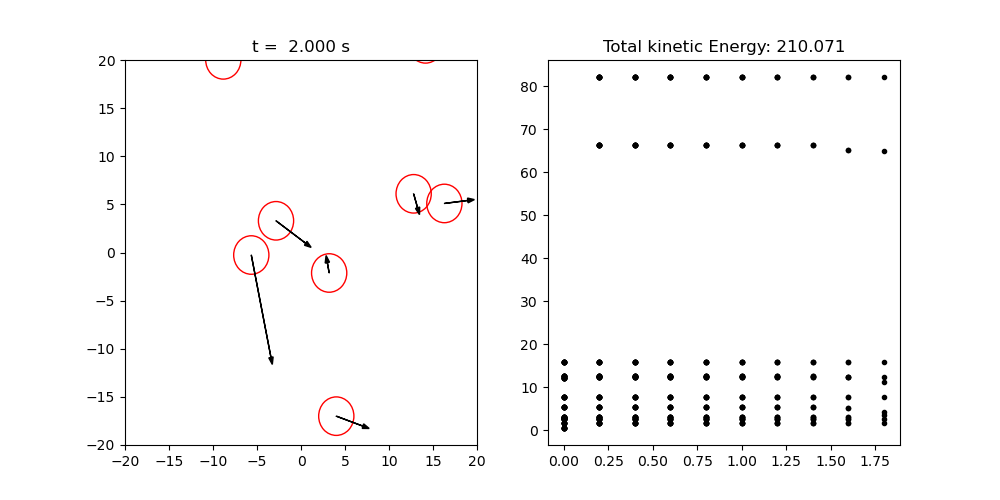

In [223]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

def init():
    
    ax.clear()
    ax.set_xlim(-20,20)
    ax.set_ylim(-20,20)
    
def Update(i):
    
    init()
    ax.set_title(r't =  %.3f s' %(t1[i]))
    
    
    # Queremos calcular la energía total de cinética
    KE = 0. # Kinetic energy
    
    for p in Particles:
        
        x = p.GetPosition(scale)[i,0]
        y = p.GetPosition(scale)[i,1]
        
        vx = p.GetVelocity(scale)[i,0]
        vy = p.GetVelocity(scale)[i,1]
        
        circle = plt.Circle( (x,y), p.radius, color='r', fill=False )
        ax.add_patch(circle)
        
        ax.arrow(x,y,vx,vy,color='k',head_width=0.5,length_includes_head=True)
        
        KE += p.GetKineticEnergy(scale)[i]
        
        ax1.set_title(r'Total kinetic Energy: {:.3f}'.format(KE))
        ax1.scatter(t1[:i], p.GetKineticEnergy(scale)[:i],color='k',marker='.')
        
Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)


a,b)

In [224]:
MomentumT = Particles[0].GetMomentum(scale)


In [225]:
for i in range(1,len(Particles)):
    MomentumT = np.add(MomentumT,Particles[i].GetMomentum(scale))


<IPython.core.display.Javascript object>


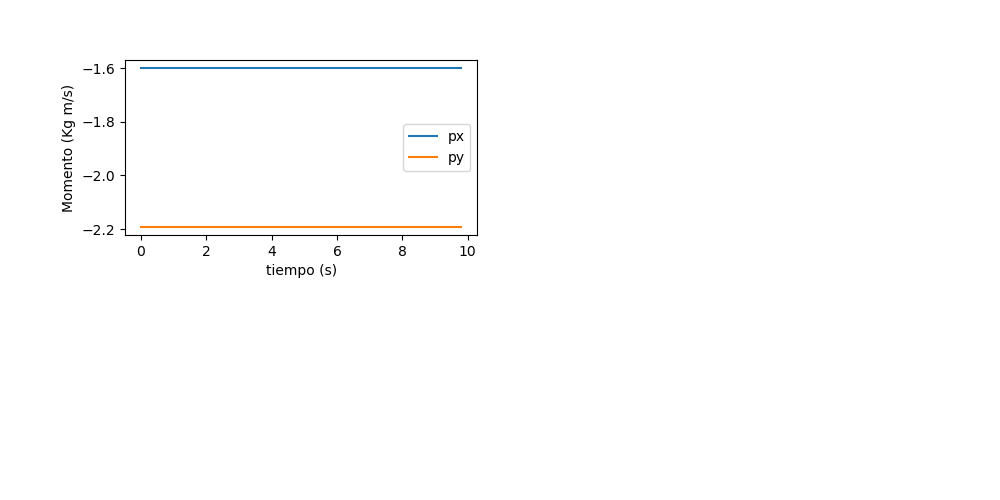

Text(0, 0.5, 'Momento (Kg m/s)')

In [226]:
fig3 = plt.figure(figsize=(10,5))
ax3 = fig3.add_subplot(221)
ax3.plot(t1,MomentumT[:,0],label='px')
ax3.plot(t1,MomentumT[:,1],label='py')
ax3.legend()
plt.xlabel("tiempo (s)")
plt.ylabel("Momento (Kg m/s)")

Sí se debería conservar .....

c)


..........

d)

In [227]:
KineticT = Particles[0].GetKineticEnergy(scale)


In [228]:
for i in range(1,len(Particles)):
    KineticT = np.add(KineticT,Particles[i].GetKineticEnergy(scale))


<IPython.core.display.Javascript object>


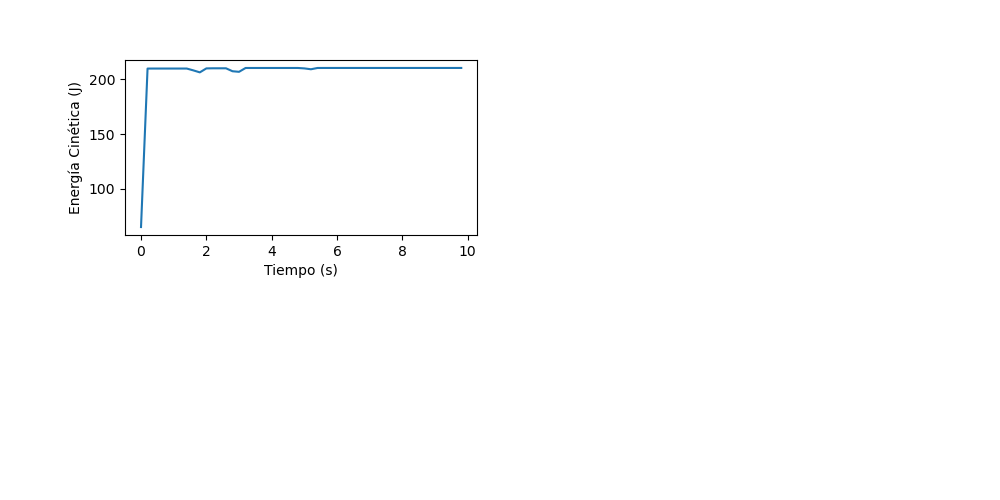

Text(0, 0.5, 'Energía Cinética (J)')

In [229]:
fig4 = plt.figure(figsize=(10,5))
ax4 = fig4.add_subplot(221)
ax4.plot(t1,KineticT)
plt.xlabel("Tiempo (s)")
plt.ylabel("Energía Cinética (J)")

Se conserva....

e)

In [184]:
PotentialT = Particles[0].GetPotential(scale)


In [185]:
for i in range(1,len(Particles)):
    PotentialT = np.add(PotentialT,Particles[i].GetPotential(scale))


<IPython.core.display.Javascript object>


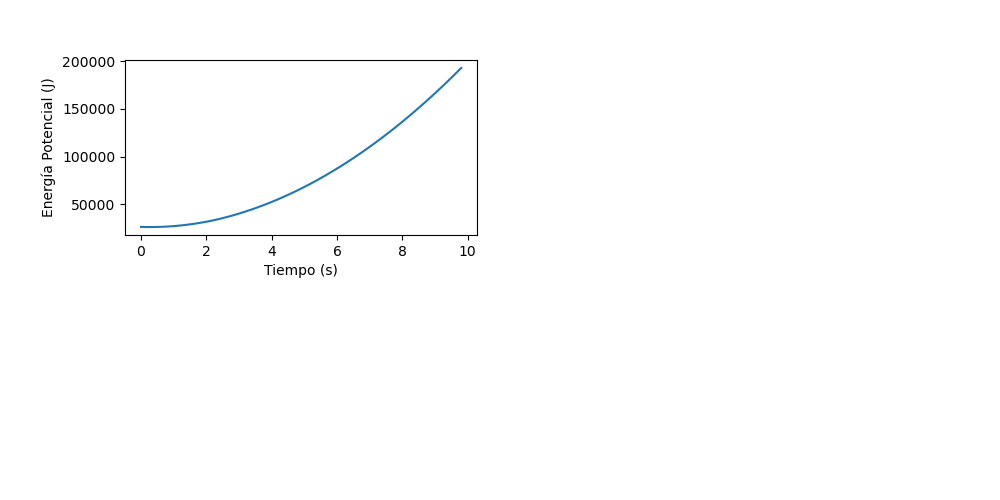

Text(0, 0.5, 'Energía Potencial (J)')

In [186]:
fig5 = plt.figure(figsize=(10,5))
ax5 = fig5.add_subplot(221)
ax5.plot(t1,PotentialT)
plt.xlabel("Tiempo (s)")
plt.ylabel("Energía Potencial (J)")

f)

In [188]:
EMec=PotentialT+KineticT

<IPython.core.display.Javascript object>


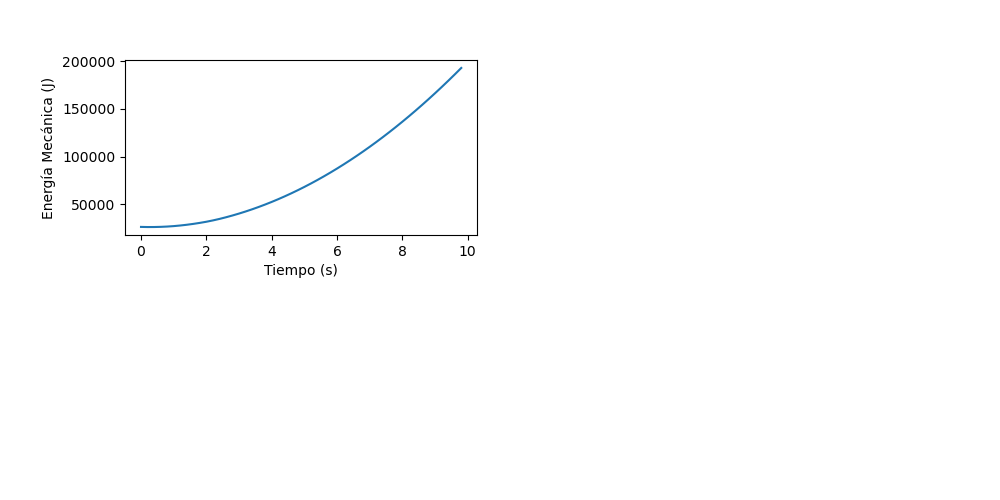

Text(0, 0.5, 'Energía Mecánica (J)')

In [189]:
fig6 = plt.figure(figsize=(10,5))
ax6 = fig6.add_subplot(221)
ax6.plot(t1,EMec)
plt.xlabel("Tiempo (s)")
plt.ylabel("Energía Mecánica (J)")

g)

sí.....

h)

3.

Sabiendo que una unidad astronómica equivale a 1.496$\times 10^{11}$m y que en un año hay $3.156\times 10^{7}$ segundos, se plantea el siguiente factor de conversión.

In [328]:
c=3e8
au=1.496e11


$$
3\times 10^8 \frac{m}{s} \times \frac{3.156\times 10^7 s}{1 año} \times \frac{1 au}{1.496\times 10^{11}m}
$$

In [329]:
c_au=c*(3.156e7)/au
c_au

63288.770053475935

La velocidad de la luz en au/año es de $63288.77$au/año

4.

In [255]:
class Planeta:
    
    def __init__(self, e, a, t):
        
        self.t = t
        self.dt = t[1] - t[0] # Paso del tiempo
        
        self.e = e # Excentricidad
        self.a_ = a # Semi-eje mayor
        
        self.G = 4*np.pi**2 # Unidades gaussianas
        
        self.r = np.zeros(3)
        self.v = np.zeros_like(self.r)
        self.a = np.zeros_like(self.r)
        
        self.r[0] = self.a_*(1-self.e)
        self.v[1] = np.sqrt( self.G*(1+self.e)/(self.a_*(1.-self.e)) )
        
        self.R = np.zeros((len(t),len(self.r)))
        self.V = np.zeros_like(self.R)
        
        # El valor del pasado
        self.rp = self.r
        
    def GetAceleration(self):
        
        d = np.linalg.norm(self.r)
        self.a = -self.G/d**3*self.r
        
        
    def Evolution(self,i):
        
        self.SetPosition(i)
        self.SetVelocity(i)
        self.GetAceleration()
        
        if i==0:
            self.r = self.rp + self.v*self.dt
        else:
            
            # rp pasado, r presente rf futuro
            self.rf = 2*self.r - self.rp + self.a*self.dt**2
            self.v = (self.rf - self.rp)/(2*self.dt)
            
            self.rp = self.r
            self.r = self.rf
    
    def SetPosition(self,i):
        self.R[i] = self.r
        
    def SetVelocity(self,i):
        self.V[i] = self.v
    
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
    
    def GetPerihelio(self):
        
        Dist = np.linalg.norm(self.R,axis=1)
        
        timeup = []
        
        for i in range(1,len(Dist)-1):
            if Dist[i] < Dist[i-1] and Dist[i] < Dist[i+1]:
                timeup.append(self.t[i])
            
        return timeup

a)

In [298]:
def GetPlanetas(t):
    
    Mercurio = Planeta(0.2056,0.387,t)
    Venus = Planeta(0.0067,0.7233,t)
    Tierra = Planeta(0.01671,1.,t)
    #Sacados de Internet
    Marte=Planeta(0.093,1.524,t)
    Jupiter=Planeta(0.049,5.2,t)
    
    return [Mercurio,Venus,Tierra,Marte,Jupiter]

In [299]:
dt = 0.001
tmax = 30
t = np.arange(0.,tmax,dt)
Planetas = GetPlanetas(t)

In [300]:
def RunSimulation(t,Planetas):
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        
        #print(it)
        for i in range(len(Planetas)):
            Planetas[i].Evolution(it)
            # Aca debes agregar la interaccion con la pared
            
            
    return Planetas

In [301]:
Planetas = RunSimulation(t,Planetas)

Running simulation: 100%|██████████| 30000/30000 [00:02<00:00, 12300.28 Steps/s]


In [311]:
Planetas[4].GetPerihelio()

[11.848, 23.705000000000002]

In [303]:
scale = 20
t1 = t[::scale]

<IPython.core.display.Javascript object>


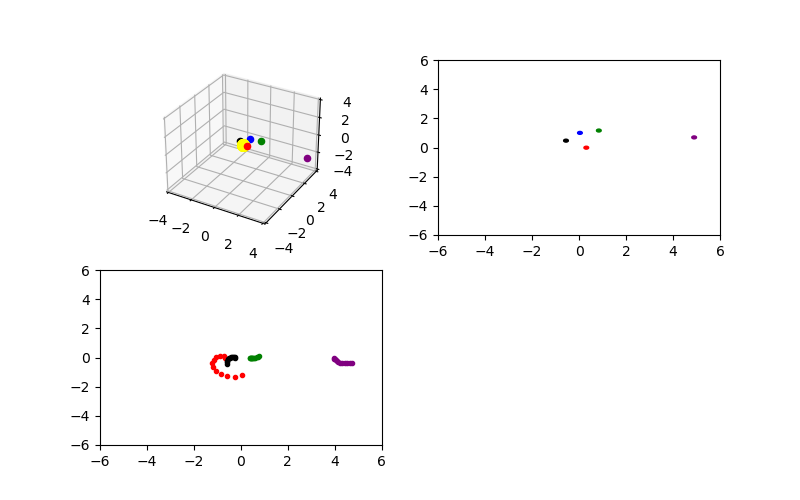

In [304]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(221,projection='3d')
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)

colors=['r','k','b',"green","purple"]

def init():
    
    ax.clear()
    ax.set_xlim(-4,4)
    ax.set_ylim(-4,4)
    ax.set_zlim(-4,4)
    
    ax1.clear()
    ax1.set_xlim(-6,6)
    ax1.set_ylim(-6,6) 
    
    ax2.clear()
    ax2.set_xlim(-6,6)
    ax2.set_ylim(-6,6) 
    
def Update(i):
    
    init()
    
    for j, p in enumerate(Planetas):
        
        x = p.GetPosition(scale)[i,0]
        y = p.GetPosition(scale)[i,1]
        z = p.GetPosition(scale)[i,2]
        
        vx = p.GetVelocity(scale)[i,0]
        vy = p.GetVelocity(scale)[i,1]
        vz = p.GetVelocity(scale)[i,2]
    
        ax.scatter(0,0,0,s=70,color='yellow')
        ax.quiver(x,y,z,vx,vy,vz,color=colors[j],length=0.03)
        
        ax.scatter(x,y,z,color=colors[j])
        
        circle = plt.Circle((x,y),0.1,color=colors[j],fill=True)
        ax1.add_patch(circle)
    
    # Mercurio visto desde Tierra
    Mx = Planetas[0].GetPosition(scale)[:i,0] - Planetas[2].GetPosition(scale)[:i,0]
    My = Planetas[0].GetPosition(scale)[:i,1] - Planetas[2].GetPosition(scale)[:i,1]
    
    # Venus visto desde Tierra
    Vx = Planetas[1].GetPosition(scale)[:i,0] - Planetas[2].GetPosition(scale)[:i,0]
    Vy = Planetas[1].GetPosition(scale)[:i,1] - Planetas[2].GetPosition(scale)[:i,1]
    
    #Marte Visto desde la Tierra
    Martx=Planetas[3].GetPosition(scale)[:i,0] - Planetas[2].GetPosition(scale)[:i,0]
    Marty=Planetas[3].GetPosition(scale)[:i,1] - Planetas[2].GetPosition(scale)[:i,1]
    
    #Jupiter visto desde la Tierra
    Jupx=Planetas[4].GetPosition(scale)[:i,0] - Planetas[2].GetPosition(scale)[:i,0]
    Jupy=Planetas[4].GetPosition(scale)[:i,1] - Planetas[2].GetPosition(scale)[:i,1]
    
    
    ax2.scatter(Mx,My,marker='.',label='Mercurio',color="red")
    ax2.scatter(Vx,Vy,marker='.',label='Venus',color="black")
    ax2.scatter(Martx,Marty,marker='.',label='Marte',color="green")
    ax2.scatter(Jupx,Jupy,marker='.',label='Jupiter',color="purple")
    
    
Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)


b)

In [309]:
i=0
Periodos=[]

while i<=4:
    lista_perihelio=Planetas[i].GetPerihelio()
    periodo=lista_perihelio[1]-lista_perihelio[0]
    
    Periodos.append(periodo)
    i+=1
    
    
Periodos=np.array(Periodos)

Periodos

array([ 0.241,  0.615,  1.001,  1.881, 11.857])

Periodo de Mercurio: 0.241 años terrestres


Periodo de Venus: 0.615 años terrestres


Periodo de Marte: 1.881 años terrestres


Periodo de Júpiter: 11.857 años terrestres

c)

<IPython.core.display.Javascript object>


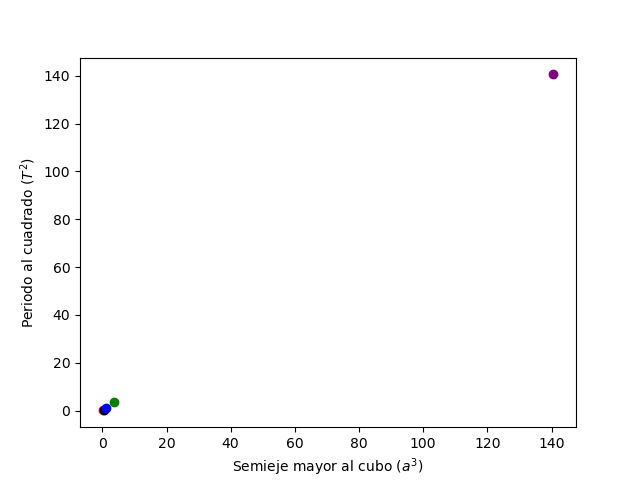

Text(0, 0.5, 'Periodo al cuadrado ($T^2$)')

In [314]:
Periodo_cuad=Periodos**2
semieje=np.array((0.387,0.7233,1.,1.524,5.2))**3

plt.scatter(semieje[0],Periodo_cuad[0],color="red")

plt.scatter(semieje[1],Periodo_cuad[1],color="black")

plt.scatter(semieje[2],Periodo_cuad[2],color="blue")

plt.scatter(semieje[3],Periodo_cuad[3],color="green")

plt.scatter(semieje[4],Periodo_cuad[4],color="purple")

plt.xlabel("Semieje mayor al cubo ($a^3$)")
plt.ylabel("Periodo al cuadrado ($T^2$)")

d)

In [318]:
def Regresion(I,V):
    n=len(I)

    sumI = np.sum(I)
    sumV = np.sum(V)

    m = (np.sum(I*V) - (sumI*sumV)/ n)/(np.sum(I**2) - (sumI**2)/n)
    b = (sumV - m*sumI)/n 
    
    IF=I.reshape((len(I),1))
    VF=V.reshape((len(V),1))
    model=linear_model.LinearRegression()
    model.fit(IF,VF)
    pred=model.predict(IF)
    R2=r2_score(VF,pred)
    
    return(m,b,R2)

In [319]:
reg=Regresion(semieje,Periodo_cuad)
xs=reg[0]*semieje + reg[1]

Text(0, 0.5, 'Periodo al cuadrado ($T^2$)')

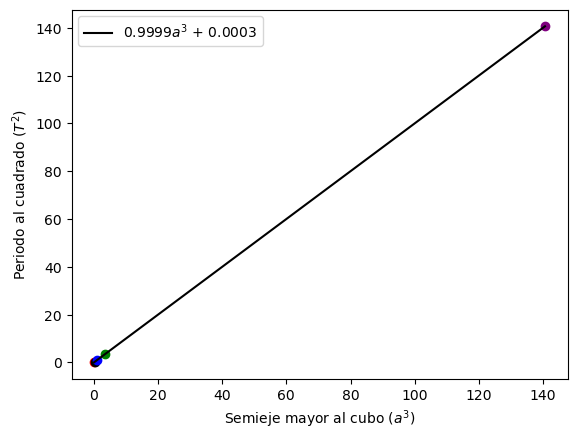

In [325]:
plt.plot(semieje,xs,color="black",label=str(round(reg[0],4))+"$a^3$ + "+str(round(reg[1],4)))


plt.scatter(semieje[0],Periodo_cuad[0],color="red")

plt.scatter(semieje[1],Periodo_cuad[1],color="black")

plt.scatter(semieje[2],Periodo_cuad[2],color="blue")

plt.scatter(semieje[3],Periodo_cuad[3],color="green")

plt.scatter(semieje[4],Periodo_cuad[4],color="purple")


plt.legend()
plt.xlabel("Semieje mayor al cubo ($a^3$)")
plt.ylabel("Periodo al cuadrado ($T^2$)")

Dado que la pendiente es lineal, se corrobora la tercera ley de Kepler, que indica que el periodo al cuadrado es proporcional al cubo de la distancia media de cada planeta respecto al sol.

e)

In [327]:
Masa_gaus=1/reg[0]
Masa_SI=Masa_gaus*1.9885e30

Masa_gaus,Masa_SI

(1.0001413763864813, 1.9887811269445178e+30)

La masa del sol en unidades gaussianas es de 1.00014, y en unidades del sistema internacional 1.98878 Kg

7.

a)

....

b)

In [ ]:
h=1
m=1
w=1